# OpenAI Gym Example

## CartPole-v0

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. 

The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from algorithms.q_learning import QLearning
from utils.plotting import plot_episode_stats
from utils.gym_wrapper import wrap_env
from algorithms.discretization_functions import discretize_cartpole_v0

matplotlib.style.use('ggplot')

#### Init the env

In [2]:
env_name = "CartPole-v0"

env = gym.make(env_name)

env = wrap_env(env, env_name)

INFO: Clearing 12 monitor files from previous run (because force=True was provided)


#### Init the Q-learning agent

In [3]:
buckets = (1, 1, 6, 12,)

agent = QLearning(env, buckets=buckets, discretize_fn=discretize_cartpole_v0)

#### Make the agent learn

In [4]:
n_episodes = 500

Q, stats = agent.learn(n_episodes)

env.close()

INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video000000.mp4
INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video000001.mp4
INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video000008.mp4
INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video000027.mp4
INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video000064.mp4
Episode 100/500.INFO: Starting new video recorder writing to /Users/alessandrostaffolani/Workspace/Thesis/gym-trials/logs/CartPole-v1-results/openaigym.video.0.1265.video00012

#### Render the results

In [5]:
fig_size = (15, 8)
smoothing_window = 10
goal_value = 195
ada_divisor = 25

###### Episode length over time

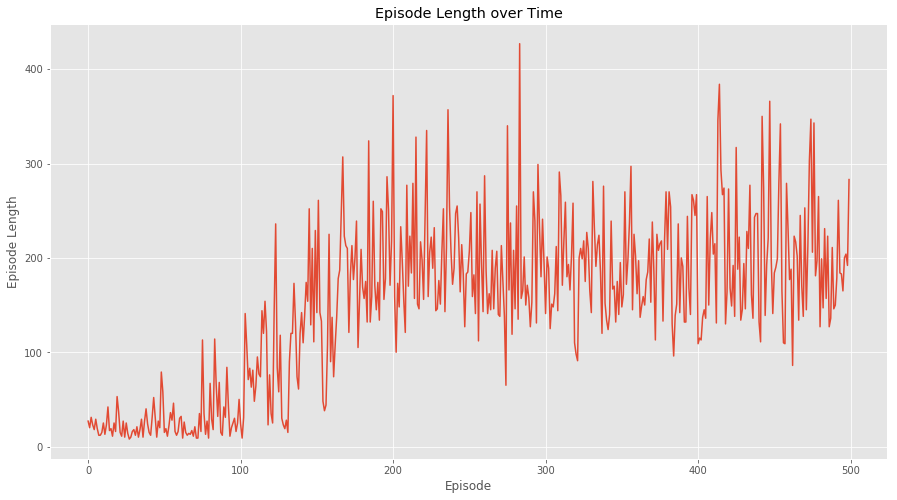

In [6]:
# Plot the episode length over time
fig1 = plt.figure(figsize=fig_size)
plt.plot(stats.episode_lengths)
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Episode Length over Time")
plt.show(fig1)

###### Episode reward over time

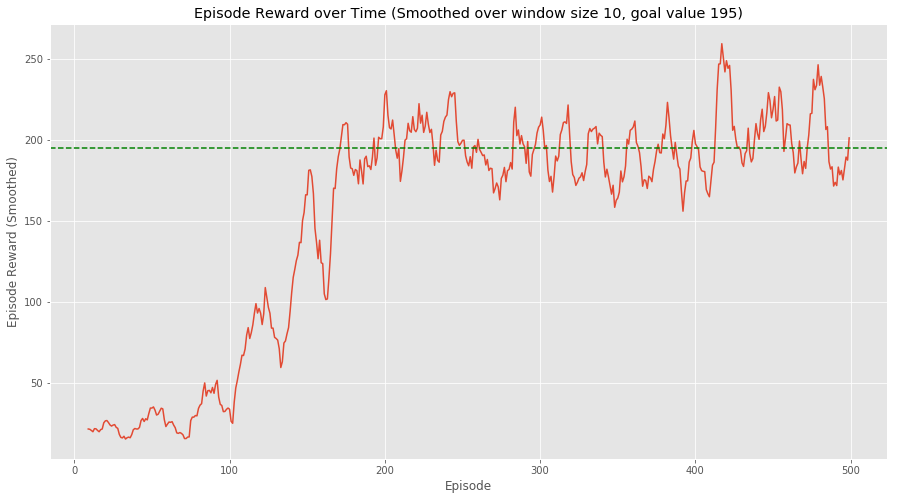

In [7]:
# Plot the episode reward over time
fig2 = plt.figure(figsize=fig_size)
rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
plt.plot(rewards_smoothed)
plt.xlabel("Episode")
plt.ylabel("Episode Reward (Smoothed)")
title = "Episode Reward over Time (Smoothed over window size {})".format(smoothing_window)

if goal_value is not None:
    plt.axhline(goal_value, color='g', linestyle='dashed')
    title = "Episode Reward over Time (Smoothed over window size" \
            " " + str(smoothing_window) + ", goal value " + str(goal_value) + ")"

plt.title(title)
plt.show(fig2)

###### Epsilon over episode

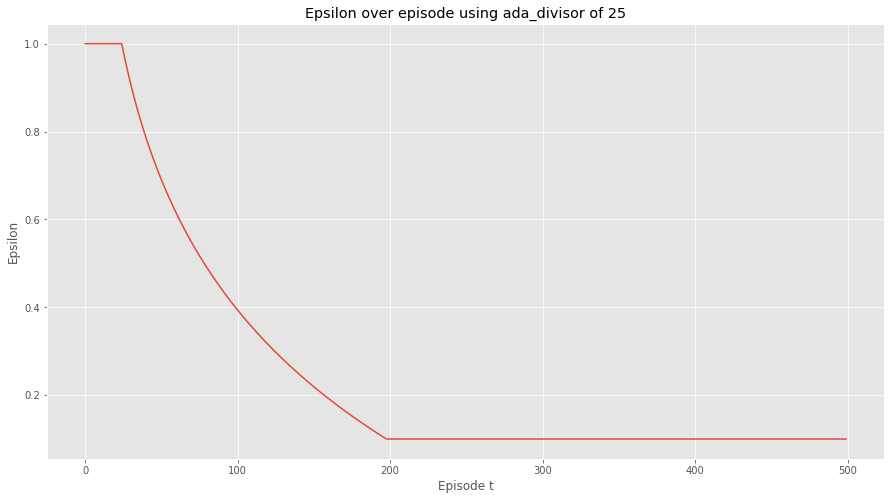

In [8]:
# Plot Epsilon over episode
fig4 = plt.figure(figsize=(15, 8))
plt.plot(np.arange(n_episodes), stats.episode_epsilon)
plt.xlabel("Episode t")
plt.ylabel("Epsilon")
plt.title("Epsilon over episode using ada_divisor of {}".format(ada_divisor))
plt.show(fig4)

###### Alpha over episode

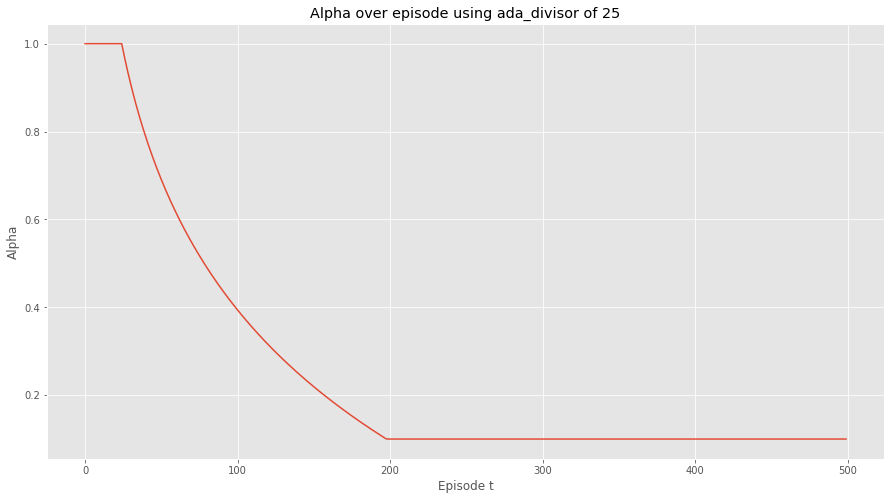

In [9]:
# Plot Epsilon over episode
fig5 = plt.figure(figsize=(15, 8))
plt.plot(np.arange(n_episodes), stats.episode_alpha)
plt.xlabel("Episode t")
plt.ylabel("Alpha")
plt.title("Alpha over episode using ada_divisor of {}".format(ada_divisor))
plt.show(fig5)